11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.3128 - val_loss: 0.1362
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1264 - val_loss: 0.1024
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0997 - val_loss: 0.0890
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0880 - val_loss: 0.0816
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0813 - val_loss: 0.0772
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0769 - val_loss: 0.0744
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0746 - val_loss: 0.0724
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0725 - val_loss: 0.0710
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0713 - val_loss: 0.0700
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0703 - val_loss: 0.0692
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0695 - val_

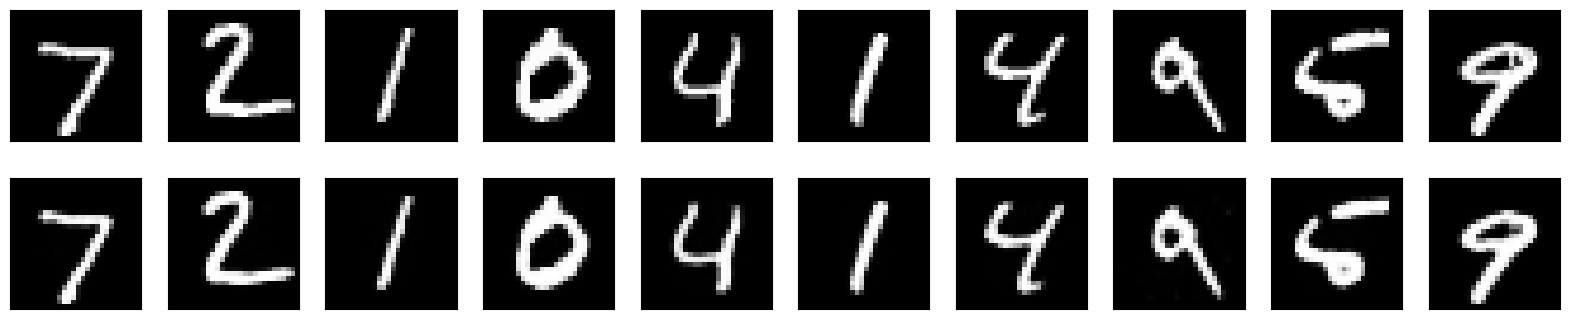

In [1]:
# Packages
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Data preprocessing
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Build autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Visualize original and reconstructed images
encoded_imgs = autoencoder.predict(x_test)
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
